# Source: day1_python_analysis.ipynb

## UCI Online Retail

In [35]:
# Importing libraries
import pandas as pd
import numpy as np

In [36]:
# Reading Excel file
file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path)

In [37]:
# Understanding dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
# Shape of the data
df.shape

(541909, 8)

In [39]:
# Check column and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [40]:
# Checking Columns
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [41]:
# Checking Missing Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [42]:
# Checking Unique count
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [43]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
328170,565765,20713,JUMBO BAG OWLS,10,2011-09-06 14:19:00,2.08,12526.0,Germany
281088,561513,22335,HEART DECORATION PAINTED ZINC,1,2011-07-27 15:12:00,1.25,NaN,United Kingdom
243469,558461,23198,PANTRY MAGNETIC SHOPPING LIST,2,2011-06-29 15:03:00,1.45,13263.0,United Kingdom
151207,549546,20727,LUNCH BAG BLACK SKULL.,10,2011-04-10 11:24:00,1.65,16889.0,United Kingdom
130743,547507,84763,ZINC FINISH 15CM PLANTER POTS,12,2011-03-23 13:39:00,1.25,16859.0,United Kingdom


### Data Cleaning

In [44]:
# Removing cancellasion transactions
new_df= df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [45]:
# Removing negitive or zero from quentities and unitprice
new_df = df[df['Quantity'] > 0]    # remove negative quantity
new_df = new_df[new_df['UnitPrice'] > 0]  # remove invalid prices

### KPI`S

##### 1. GMV (Gross Merchandise Value)

In [46]:
new_df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [47]:
print("GMV:-",new_df['TotalPrice'].sum())

GMV:- 10666684.544


##### 2.AOV (Average Order Value)

In [48]:
orders = new_df.groupby("InvoiceNo")['TotalPrice'].sum()
AOV = orders.mean()
print("AOV:- ",AOV)

AOV:-  534.403033266533


##### 3.CLV (Customer Lifetime Value)

In [49]:
clv = new_df.groupby('CustomerID')['TotalPrice'].sum()
clv.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: TotalPrice, dtype: float64

##### 4.Repeat Purchase Rate

In [50]:
repeat_rate = (df.groupby('CustomerID')['InvoiceNo'].nunique() > 1).mean()
print("Repeat_Rate:-",repeat_rate)

Repeat_Rate:- 0.69967978042086


# Source: day2_SQL_Analysis.ipynb

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Customer_Segmentation\Excel File\cleaned_online_retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 00:00:00,2.55,17850,United Kingdom\r
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 00:00:00,3.39,17850,United Kingdom\r
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 00:00:00,2.75,17850,United Kingdom\r
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 00:00:00,3.39,17850,United Kingdom\r
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 00:00:00,3.39,17850,United Kingdom\r


In [5]:
df.shape

(530100, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530100 entries, 0 to 530099
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530100 non-null  object 
 1   StockCode    530100 non-null  object 
 2   Description  530100 non-null  object 
 3   Quantity     530100 non-null  object 
 4   InvoiceDate  530100 non-null  object 
 5   UnitPrice    530100 non-null  float64
 6   CustomerID   530100 non-null  object 
 7   Country      530099 non-null  object 
dtypes: float64(1), object(7)
memory usage: 32.4+ MB


In [9]:
# Converting data type
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'],errors='coerce')

In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [15]:
# Total Revenue
sum = df['TotalPrice'].sum()
print("Total Revenue:-", sum)

Total Revenue:- 10666677.040000001


In [24]:
df.groupby('CustomerID')['InvoiceNo'].nunique().head()

CustomerID
0        1195
12346       1
12347       6
12348       3
12349       1
Name: InvoiceNo, dtype: int64

#### 1.Total Sales

In [27]:
df['TotalPrice'].sum()

10666677.040000001

#### 2.Invoice per Customer

In [31]:
df.groupby('CustomerID')['InvoiceNo'].nunique().head()

CustomerID
0        1195
12346       1
12347       6
12348       3
12349       1
Name: InvoiceNo, dtype: int64

#### 3.Revenue per Customer

In [33]:
df.groupby('CustomerID')['TotalPrice'].sum().head()

CustomerID
0        1577351.06
12346      77183.60
12347       3834.61
12348       1569.80
12349       1757.55
Name: TotalPrice, dtype: float64

#### 4.Total Revenue by country

In [37]:
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head()

Country
United Kingdom\r    9025214.58
Netherlands\r        285446.34
EIRE\r               283453.96
Germany\r            228867.14
France\r             209715.11
Name: TotalPrice, dtype: float64

#### 5.Monthly Sales Trends

In [41]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [45]:
df['month']=df['InvoiceDate'].dt.to_period('M')

In [46]:
df.groupby('month')['TotalPrice'].sum().head()

month
2010-12    823746.14
2011-01    691364.56
2011-02    523631.89
2011-03    717631.86
2011-04    537808.62
Freq: M, Name: TotalPrice, dtype: float64

# Source: Day3_Exploratory_Data_Analysis.ipynb

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # ignore unnecessary warnings

In [2]:
# Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Customer_Segmentation\Excel File\cleaned_online_retail.csv")

# View basic information about the dataset
print("Shape of dataset:", df.shape)
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Shape of dataset: (530100, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530100 entries, 0 to 530099
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530100 non-null  object 
 1   StockCode    530100 non-null  object 
 2   Description  530100 non-null  object 
 3   Quantity     530100 non-null  object 
 4   InvoiceDate  530100 non-null  object 
 5   UnitPrice    530100 non-null  float64
 6   CustomerID   530100 non-null  object 
 7   Country      530099 non-null  object 
dtypes: float64(1), object(7)
memory usage: 32.4+ MB

Missing values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        1
dtype: int64

Duplicate rows: 5223


In [3]:
# Step 3: Clean the dataset

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Clean unwanted characters in 'Country'
df['Country'] = df['Country'].str.replace('\r', "")

# Convert Quantity to numeric and handle errors
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Remove missing values
df.dropna(inplace=True)

# Create a new column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 00:00:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 00:00:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 00:00:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 00:00:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 00:00:00,3.39,17850,United Kingdom,20.34


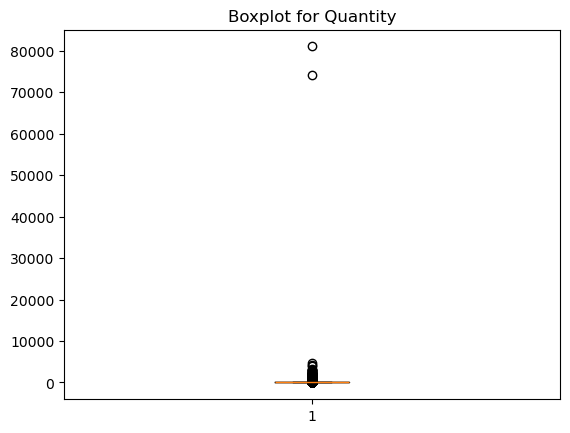

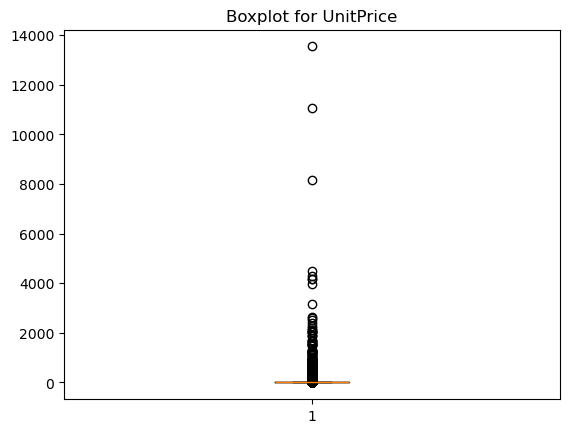

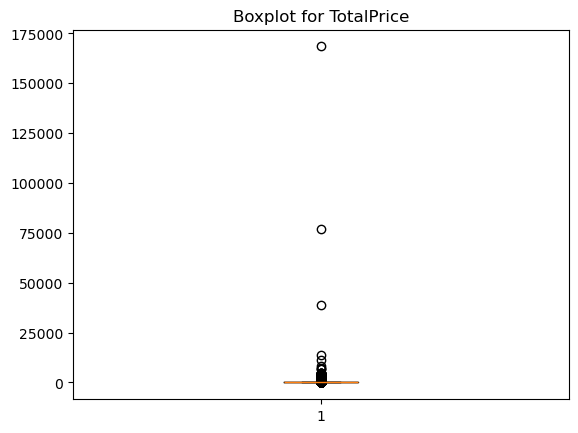

In [4]:
# Step 4: Visualize outliers in numeric columns
cols = df.select_dtypes(include='number')

for col in cols:
    plt.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [5]:
# Step 5: Handle outliers in main data using IQR (Interquartile Range)

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)  # cap values within range


In [6]:
# Step 6: Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524876 entries, 0 to 530099
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524876 non-null  object        
 1   StockCode    524876 non-null  object        
 2   Description  524876 non-null  object        
 3   Quantity     524876 non-null  float64       
 4   InvoiceDate  524876 non-null  datetime64[ns]
 5   UnitPrice    524876 non-null  float64       
 6   CustomerID   524876 non-null  object        
 7   Country      524876 non-null  object        
 8   TotalPrice   524876 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 40.0+ MB


In [7]:
# Step 7: Set reference date (1 day after last invoice)
import datetime as dt

reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference Date:", reference_date)


Reference Date: 2011-12-10 00:00:00


In [8]:
# Step 8: Create RFM table (Recency, Frequency, Monetary)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,0,1,1195,1019071.96
1,12346,326,1,38.40
2,12347,3,6,3233.83
3,12348,76,3,820.28
4,12349,19,1,1412.60


In [9]:
# Step 9: Clean RFM data
# Remove invalid or null customer IDs
rfm = rfm[rfm['CustomerID'] != 0]

# Check for missing values and summary
print(rfm.isnull().sum(), '\n')
print(rfm.describe())


CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64 

           Recency    Frequency       Monetary
count  5564.000000  5564.000000    5564.000000
mean    135.549605     3.373293    1024.685390
std     119.523150     6.816272    3075.850736
min       1.000000     1.000000       3.750000
25%      24.750000     1.000000     217.847500
50%      82.000000     2.000000     451.580000
75%     267.000000     4.000000    1023.282500
max     374.000000   236.000000  138802.940000


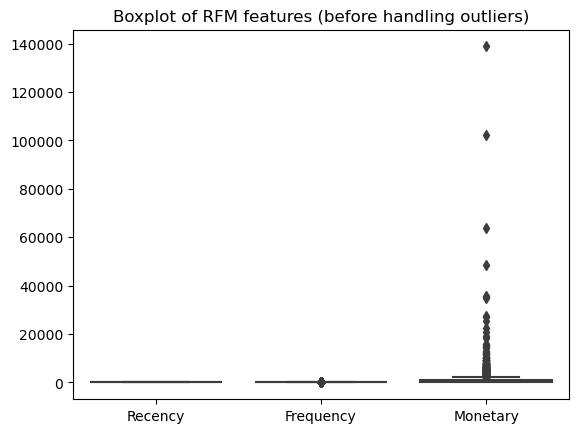

In [10]:
# Step 10: Visualize RFM outliers before handling
sns.boxplot(data=rfm[['Recency', 'Frequency', 'Monetary']])
plt.title("Boxplot of RFM features (before handling outliers)")
plt.show()


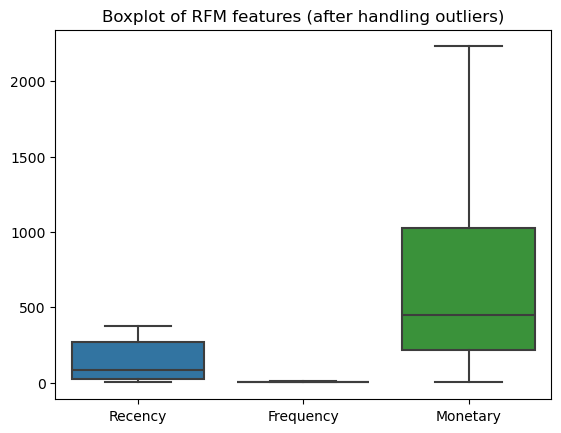

,Recency,Frequency,Monetary
count,5564.000000,5564.000000,5564.000000
mean,135.549605,2.715852,731.836945
std,119.523150,2.300351,683.170454
min,1.000000,1.000000,3.750000
25%,24.750000,1.000000,217.847500
50%,82.000000,2.000000,451.580000
75%,267.000000,4.000000,1023.282500
max,374.000000,8.500000,2231.435000


In [11]:
# Step 11: Handle outliers in RFM data (same format as Step 5)

for col in ['Recency', 'Frequency', 'Monetary']:
    Q1 = rfm[col].quantile(0.25)
    Q3 = rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap values within limits instead of removing rows
    rfm[col] = rfm[col].clip(lower, upper)

# Visualize boxplots after handling outliers
sns.boxplot(data=rfm[['Recency', 'Frequency', 'Monetary']])
plt.title("Boxplot of RFM features (after handling outliers)")
plt.show()

# Check summary statistics again
rfm.describe()


In [12]:
# Step 12: Scale RFM values using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

rfm_scaled = pd.DataFrame(
    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']]),
    columns=['Recency', 'Frequency', 'Monetary']
)

rfm_scaled.head()


,Recency,Frequency,Monetary
0,0.871314,0.000000,0.015554
1,0.005362,0.666667,1.000000
2,0.201072,0.266667,0.366537
3,0.048257,0.000000,0.632428
4,0.096515,0.266667,0.384112


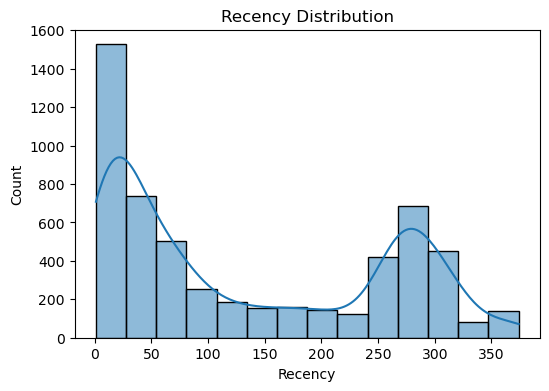

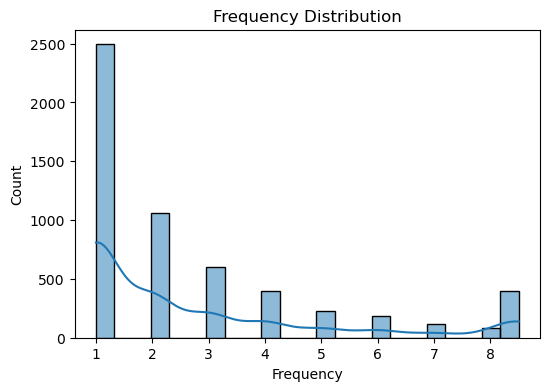

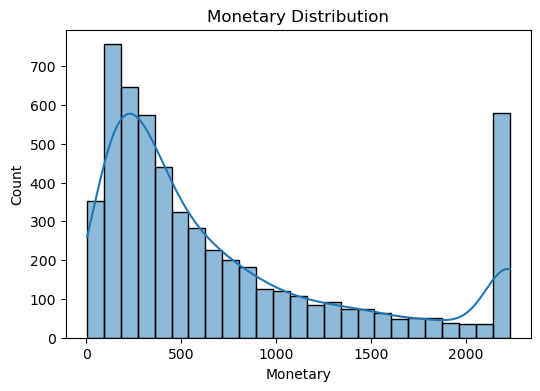

In [13]:
# Step 13: Visualize RFM distributions
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(6, 4))
    sns.histplot(rfm[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show()


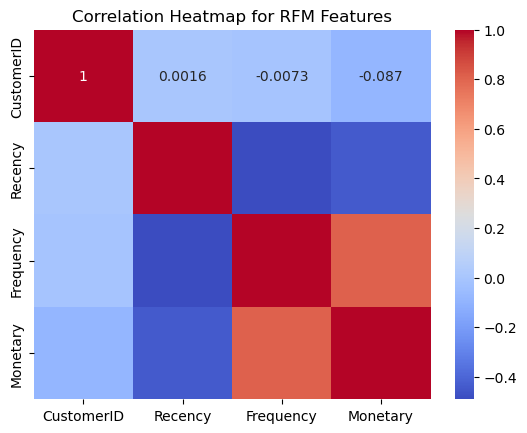

In [14]:
# Step 14: Correlation between RFM features
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for RFM Features")
plt.show()


In [15]:
# Step 15: Save the final scaled RFM data to a CSV file
rfm_scaled.to_csv('rfm_scaled.csv', index=False)

print("✅ RFM scaled data saved successfully as 'rfm_scaled.csv'")


✅ RFM scaled data saved successfully as 'rfm_scaled.csv'


In [16]:
rfm.to_csv("rfm.csv",index=False)

# Source: Day 4 – K-Means Clustering on RFM Data.ipynb

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

rfm_scaled = pd.read_csv(r"C:\Users\HP\Desktop\Customer_Segmentation\Excel File\rfm_scaled.csv")

rfm = pd.read_csv(r"C:\Users\HP\Desktop\Customer_Segmentation\Excel File\rfm.csv")

rfm_scaled.head()


,Recency,Frequency,Monetary
0,0.871314,0.000000,0.015554
1,0.005362,0.666667,1.000000
2,0.201072,0.266667,0.366537
3,0.048257,0.000000,0.632428
4,0.096515,0.266667,0.384112


In [11]:
rfm_scaled.index == rfm.index 

array([ True,  True,  True, ...,  True,  True,  True])

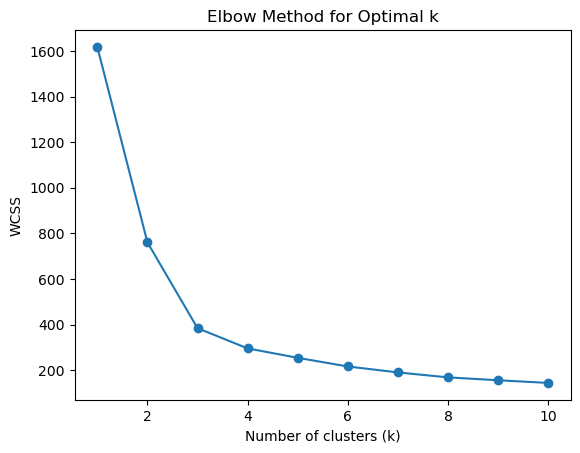

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)
rfm_scaled['Cluster'] = kmeans.labels_

In [14]:
rfm['Cluster'] = rfm_scaled['Cluster']

# Compute mean RFM per cluster
cluster_summary = rfm.groupby('Cluster').mean().round(1)
cluster_summary

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15313.9,276.3,1.4,364.8
1,15124.3,49.1,4.0,1262.9
2,15241.1,28.6,7.6,2049.4
3,15373.8,60.1,1.7,373.5


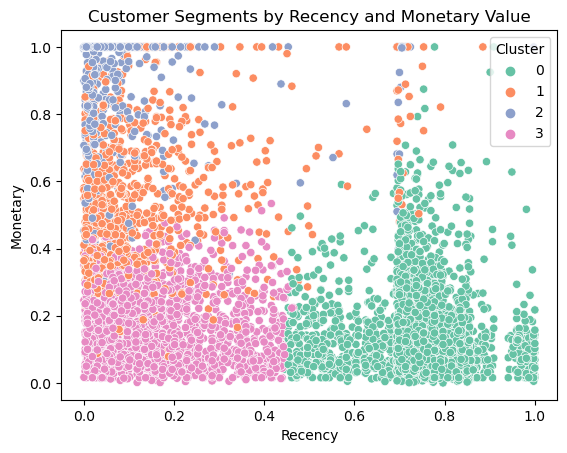

In [15]:
import seaborn as sns
sns.scatterplot(data=rfm_scaled, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('Customer Segments by Recency and Monetary Value')
plt.show()

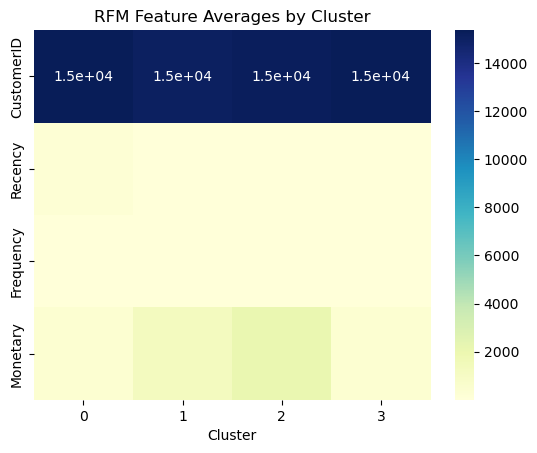

In [16]:
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu')
plt.title('RFM Feature Averages by Cluster')
plt.show()

In [17]:
cluster_labels = {
    0: 'VIP',
    1: 'Regular',
    2: 'Churn Risk',
    3: 'Occasional'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

In [18]:
rfm.to_csv("rfm_clustered.csv", index=False)

# Source: Day 6 – Churn Target & Feature Engineering.ipynb

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Customer_Segmentation\Excel File\rfm_clustered.csv")

In [3]:
df.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346,326,1.0,38.400,0,VIP
1,12347,3,6.0,2231.435,2,Churn Risk
2,12348,76,3.0,820.280,1,Regular
3,12349,19,1.0,1412.600,1,Regular
4,12352,37,3.0,859.430,1,Regular


In [4]:
df['Churn'] = np.where(df['Recency'] > 90, 1, 0)

In [9]:
features = ['Recency', 'Frequency', 'Monetary', 'Cluster']
target = 'Churn'

X = df[features]
y = df[target]

In [10]:
X.head()

,Recency,Frequency,Monetary,Cluster
0,326,1.0,38.400,0
1,3,6.0,2231.435,2
2,76,3.0,820.280,1
3,19,1.0,1412.600,1
4,37,3.0,859.430,1


In [12]:
from sklearn.preprocessing import MinMaxScaler

x_scaled = pd.DataFrame(
    scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']]),
    columns=['Recency', 'Frequency', 'Monetary']
)

x_scaled.head()

,Recency,Frequency,Monetary
0,0.871314,0.000000,0.015554
1,0.005362,0.666667,1.000000
2,0.201072,0.266667,0.366537
3,0.048257,0.000000,0.632428
4,0.096515,0.266667,0.384112


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)

<Axes: xlabel='Churn', ylabel='count'>

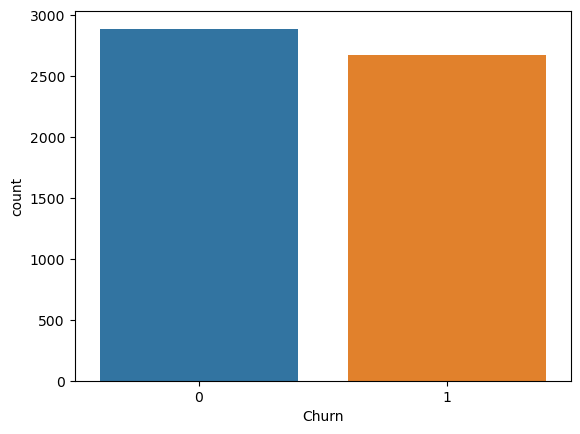

In [17]:
# 1.Count of Churn vs Active
sns.countplot(x='Churn', data=df)

<Axes: xlabel='Churn', ylabel='Monetary'>

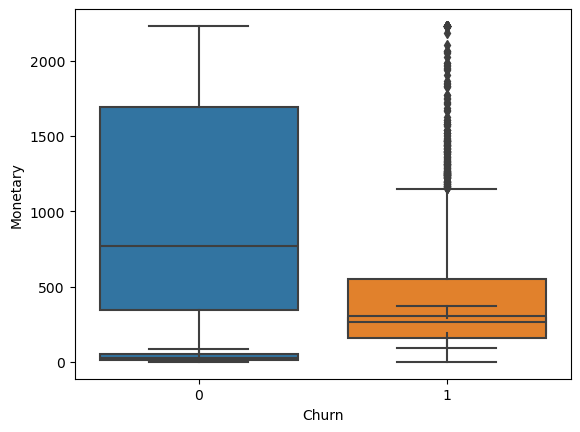

In [18]:
# 2.Boxplots of RFM by Churn
sns.boxplot(x='Churn', y='Recency', data=df)
sns.boxplot(x='Churn', y='Monetary', data=df)

# Source: Day 7 – Churn Prediction using Logistic Regression.ipynb

## Import Data and Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
rfm = pd.read_csv(r"C:\Users\HP\Desktop\Customer_Segmentation\Excel File\rfm_clustered.csv")

# Define features and target
rfm['Churn'] = np.where(rfm['Recency'] > 90, 1, 0)
X = rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']]
y = rfm['Churn']

## Split Data into Train and Test Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Scale the Features

In [4]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression Model

In [5]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

## Make Predictions

In [6]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability for ROC curve

## Evaluate Model Performance

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.9739442946990117
Precision: 1.0
Recall: 0.9448669201520913
F1 Score: 0.9716520039100685
ROC-AUC: 0.9999125540059981


## Confusion Matrix Visualization

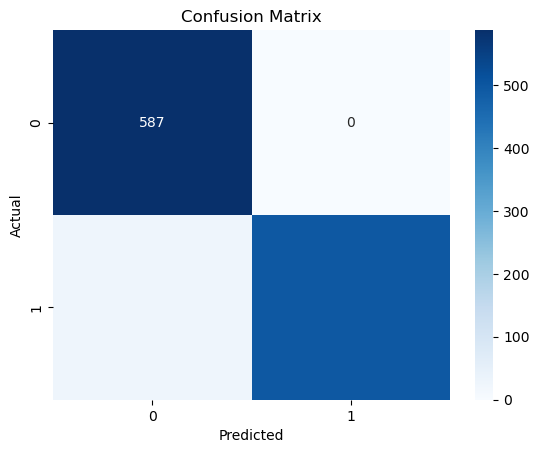

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve

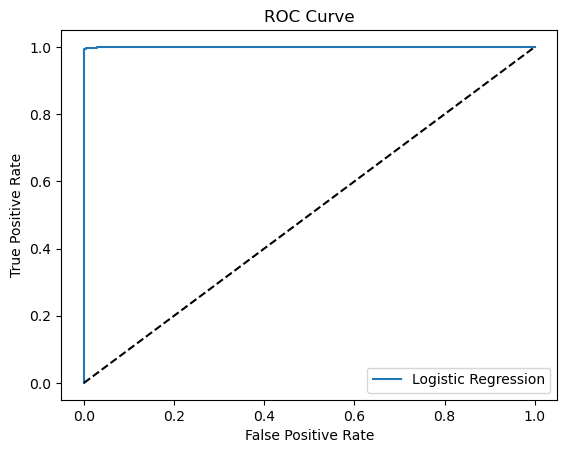

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

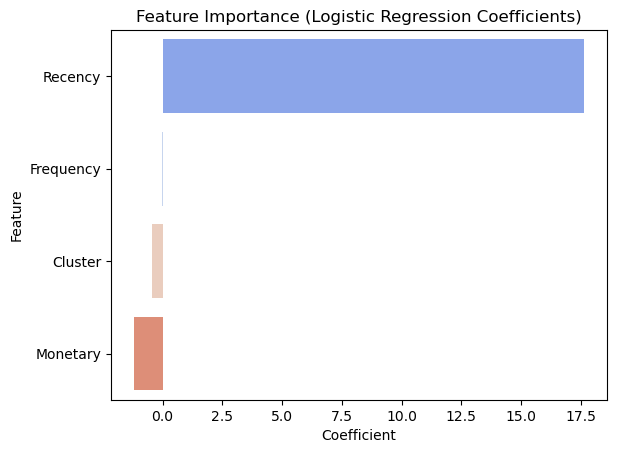

In [10]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

sns.barplot(data=importance, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

# Source: Day8_RandomForest_XGBoost_ChurnPrediction.ipynb

## Import Libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
rfm = pd.read_csv(r"C:\Users\HP\Desktop\Customer_Segmentation\Excel File\rfm_clustered.csv")
rfm['Churn'] = np.where(rfm['Recency'] > 90, 1, 0)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment,Churn
0,12346,326,1.0,38.400,0,VIP,1
1,12347,3,6.0,2231.435,2,Churn Risk,0
2,12348,76,3.0,820.280,1,Regular,0
3,12349,19,1.0,1412.600,1,Regular,0
4,12352,37,3.0,859.430,1,Regular,0


## Define Features and Target

In [4]:
X = rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']]
y = rfm['Churn']

## Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Scale the Features (MinMaxScaler)

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Random Forest Model

In [7]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

## Train XGBoost Model

In [8]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:32:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluate Random Forest

In [9]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Results")
print("----------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Results
----------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


## Evaluate XGBoost

In [10]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("XGBoost Results")
print("----------------")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Results
----------------
Accuracy: 0.9991015274034142
Precision: 1.0
Recall: 0.9980988593155894
F1 Score: 0.9990485252140818
ROC-AUC: 0.9999967612594813


## Confusion Matrix – XGBoost

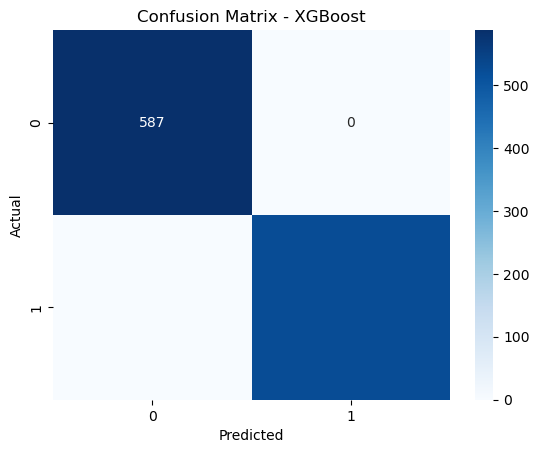

In [11]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

## ROC Curves Comparison

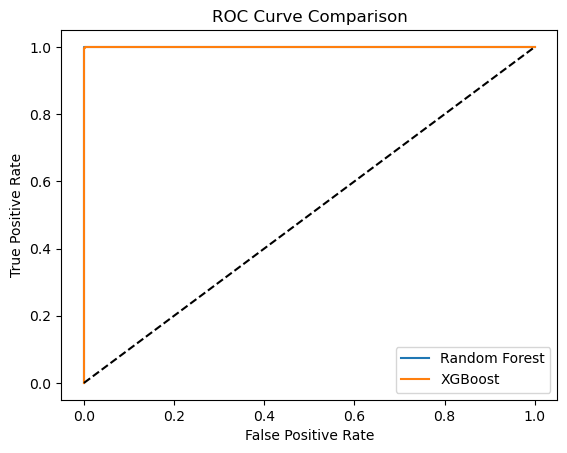

In [12]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## Feature Importance – Random Forest

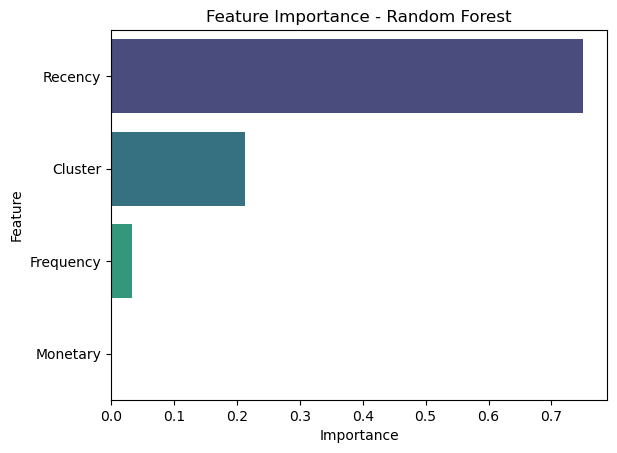

In [13]:
importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=importances_rf, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.show()

## Feature Importance – XGBoost

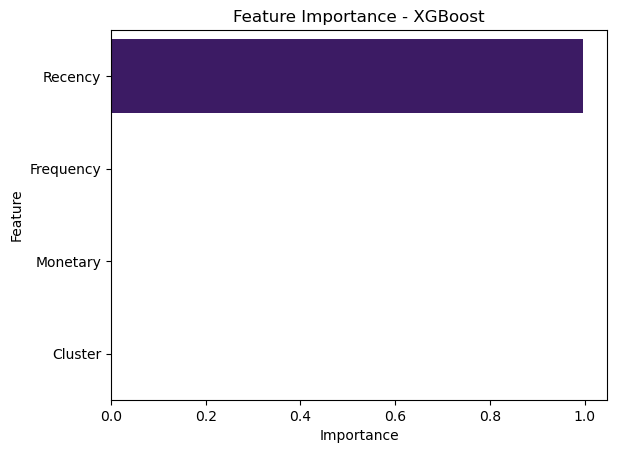

In [14]:
importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=importances_xgb, x='Importance', y='Feature', palette='magma')
plt.title("Feature Importance - XGBoost")
plt.show()

In [15]:
print("Random Forest - Training Accuracy:", rf_model.score(X_train_scaled, y_train))
print("Random Forest - Testing Accuracy:", rf_model.score(X_test_scaled, y_test))

print("XGBoost - Training Accuracy:", xgb_model.score(X_train_scaled, y_train))
print("XGBoost - Testing Accuracy:", xgb_model.score(X_test_scaled, y_test))

Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 1.0
XGBoost - Training Accuracy: 0.9995506627724107
XGBoost - Testing Accuracy: 0.9991015274034142


## Random Forest — Hyperparameter Tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Base model
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Random search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train_scaled, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best CV ROC-AUC:", rf_random.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Best CV ROC-AUC: 1.0


In [17]:
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

## XGBoost — Hyperparameter Tuning

In [18]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train_scaled, y_train)

print("Best Parameters:", xgb_random.best_params_)
print("Best CV ROC-AUC:", xgb_random.best_score_)

Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}
Best CV ROC-AUC: 0.9999979777553083


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:33:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
best_xgb = xgb_random.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

In [20]:
print("Random Forest ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:,1]))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, best_xgb.predict_proba(X_test_scaled)[:,1]))


Random Forest ROC-AUC: 1.0
XGBoost ROC-AUC: 0.9999951418892221


## Make Predictions and Probabilities

In [21]:
# Churn probability
rfm['Churn_Probability'] = best_xgb.predict_proba(X)[:, 1]

# Optional: Predicted churn label (0 or 1)
rfm['Predicted_Churn'] = (rfm['Churn_Probability'] > 0.5).astype(int)

In [22]:
# Save to CSV for Power BI
rfm.to_csv("churn_predictions_for_powerbi.csv", index=False)

In [23]:
importances_xgb.to_csv("feature_importance.csv", index=False)